# ARDUAIR: Procesamiento de datos PM10
Se procesan los datos para obtener un archivo CSV con los promedios hora de las lecturas de pm10  de las fechas 17, 18 y 19 de abril de 2017

Se filtran los datos extraños por encima de (lecturas por encima de 1000000) para este caso


## importacion de librerias

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None 

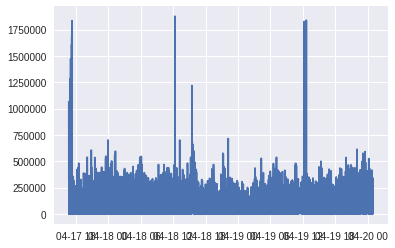

In [3]:
#load
data=pd.read_csv('DATA.TXT',names=['year','month','day','hour','minute','second','hum','temp','pr','l','co','so2','no2','o3','pm10','pm25','void'])

#Dates to datetime
dates=data[['year','month','day','hour','minute','second']]
dates['year']=dates['year'].add(2000)
dates['minute']=dates['minute'].add(60)
data['datetime']=pd.to_datetime(dates)


#agregation
data=data[['datetime','pm10']]

plt.plot(data.datetime, data.pm10)

# filtration

Se filtran los datos extraños por encima de (lecturas por encima de 1000000) para este caso



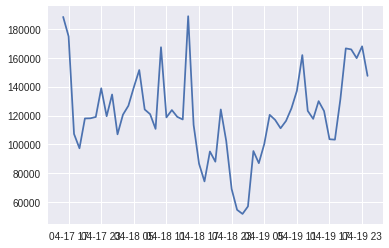

In [5]:
#load
data=pd.read_csv('DATA.TXT',names=['year','month','day','hour','minute','second','hum','temp','pr','l','co','so2','no2','o3','pm10','pm25','void'])

data=data[data.pm10<1000000]
#Dates to datetime
dates=data[['year','month','day','hour','minute','second']]
dates['year']=dates['year'].add(2000)
dates['minute']=dates['minute'].add(60)
data['datetime']=pd.to_datetime(dates)
data=data[['datetime','pm10']]

#agregation
data1=data.groupby(pd.Grouper(key='datetime',freq='1h',axis=1)).mean()
data2=data.groupby(pd.Grouper(key='datetime',freq='2h',axis=1)).mean()
data3=data.groupby(pd.Grouper(key='datetime',freq='3h',axis=1)).mean()

# save
data1.to_csv('arduair_pm10_promedio_1h.csv')
data2.to_csv('arduair_pm10_promedio_2h.csv')
data3.to_csv('arduair_pm10_promedio_3h.csv')
# reset index
data=data.reset_index()
data1=data1.reset_index()
data2=data2.reset_index()
data2=data2.reset_index()
plt.plot(data1.datetime, data1.pm10)

## ¿Que pasa si eliminamos los valores en 0.00?

Realizando la correlacion con los datos generados por el Dusttrack,la correlacion es 0.3 comparada con 0.48 de los datos originales

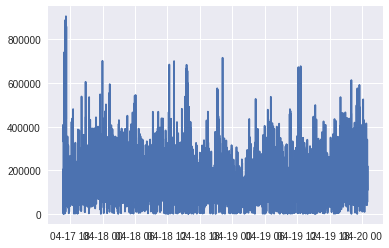

In [49]:
data_sin_ceros=data[data.pm10>0]
plt.plot(data_sin_ceros.datetime, data_sin_ceros.pm10)

data_sin_ceros_1h=data_sin_ceros.groupby(pd.Grouper(key='datetime',freq='1h',axis=1)).mean()

